# Airline Pricing pattern 

## Phase-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

# choose a matplotlib style option
plt.style.use('fivethirtyeight')

# choose seaborn style option
sns.set_style('darkgrid')

### Load dataset

In [2]:
#Load the dataset using pandas
df=pd.read_csv(r"D:\Datasets\flight\airlines_flights_data1.csv")
df_bkp=df  

**Observation**:
 - Dataset has been loaded successfully using pd.read_csv()
 - Assigned to the variable named 'df'

### Understanding the Structure of the Dataset

In [3]:
df.shape

(306156, 12)

In [4]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

Observation:
 - The dataset contains 306156 rows and 12 columns representing various job-related features.
 - The data had following data columns:
**airline**:  

Name of the airline operating the flight (e.g., Indigo, Air India, Vistara).

Useful for comparing average prices between airlines.

**flight**:  

Flight code (combination of airline prefix + numeric ID, e.g., "AI-203").

Helps identify the specific flight service.

Used to fill missing airline names.

**source_city**  

The city where the flight originates `(e.g., Delhi, Mumbai, Bangalore)`.

Important for `analyzing popular departure points`.

**destination_city**:   

The city where the flight lands.

Together with source_city, forms a route `(e.g., "Delhi → Mumbai").`

Key for `analyzing busiest travel routes`.

**class**:  

-Travel class of the ticket `(Economy or Business)`.

-Directly impacts ticket price (Business much higher than Economy).

**departure_time**:    

-Time of flight departure, grouped into categories `(Morning, Afternoon, Evening, Night, etc.)`.

-Helps analyze time-based price patterns.

-Can be simplified by merging similar categories (e.g., Morning + Early Morning).

**stops**:    

-Number of stops during the flight `(non-stop, 1 stop, 2+ stops)`.

-Strongly affects duration and price.

**duration**:  

-Total travel time (in hours).

-Direct flights usually shorter, connecting flights longer.

-Useful for correlation with price.

**days_left**:  

-Days remaining before the departure date when the ticket was booked.
**price**:  

-Ticket price (target variable for analysis).

-Highly influenced by airline, class, days_left, and stops.

### Previewing the first few rows

In [5]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955.0


### Observation:
 - The preview shows the first few rows of the data and helps us check if the file loaded correctly.


In [6]:
df.set_index('index', inplace=True)


* setting index column as index

### Dataset Structure and Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306156 entries, 0 to 86011
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300152 non-null  object 
 1   flight            306156 non-null  object 
 2   source_city       306156 non-null  object 
 3   departure_time    306156 non-null  object 
 4   stops             306156 non-null  object 
 5   arrival_time      306156 non-null  object 
 6   destination_city  306156 non-null  object 
 7   class             306156 non-null  object 
 8   duration          300152 non-null  float64
 9   days_left         306156 non-null  int64  
 10  price             300152 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 28.0+ MB


### Observation:
 - The dataset contains 306156, records and 12 columns.
 - Out of the 12 columns:
    - 8 are categorical (object type), such as Job Title, Industry, and Location.
    - 4 are numerical (float64,int64)
 - The dataset occupies approximately 28 MB of memory.
 - The data containing duplicate values and null values

### Statistical Overview of Numerical Data

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300152.0,12.222900,7.192281,0.83,6.83,11.25,16.17,49.83
days_left,306156.0,26.005095,13.559849,1.00,15.00,26.00,38.00,49.00
price,300152.0,20890.477042,22699.258400,1105.00,4783.00,7425.00,42521.00,123071.00


### Observation:
 - The summary shows fundamental statistical measures like count ,mean, min, max, and standard deviation for all numerical columns.
 - For example: The average time of travel is 12hrs 22min ,and the Maximum duration of journey is 49hrs 83min
 - The price range is between 1,105 - 1,23,071/-
 - average price is 20,889/-
 - Some values indicate the presence of outliers.


### Null Value Count Across All Columns

In [9]:
df.isnull().sum()

airline             6004
flight                 0
source_city            0
departure_time         0
stops                  0
arrival_time           0
destination_city       0
class                  0
duration            6004
days_left              0
price               6004
dtype: int64

### Percentage of Missing Values

In [10]:
round(df.isnull().sum()/len(df)*100,2)

airline             1.96
flight              0.00
source_city         0.00
departure_time      0.00
stops               0.00
arrival_time        0.00
destination_city    0.00
class               0.00
duration            1.96
days_left           0.00
price               1.96
dtype: float64

### Observation:
 - The dataset exhibits missing values across multiple columns.
 - airline has 1.96% missing values.
      - Type of missing value: Missing at Random (MAR)
 - duration has 1.96% missing values.
      - Type of missing value: Missing at Random (MAR) 
 - price has 1.96%  missing values.
      - Type of missing value: Missing at Random (MAR)
 - For all remaining columns there is no missing values

### Understand categories


In [11]:
print("===== Airline Value Counts =====")
print(df["airline"].value_counts(), "\n")

print("===== Destination Value Counts =====")
print(df["destination_city"].value_counts(), "\n")

print("===== Class Value Counts =====")

print(df["class"].value_counts(), "\n")


===== Airline Value Counts =====
airline
Vistara      127867
Air_India     80904
Indigo        43148
GO_FIRST      23142
AirAsia       16084
SpiceJet       9007
Name: count, dtype: int64 

===== Destination Value Counts =====
destination_city
Mumbai       60245
Delhi        58528
Bangalore    52040
Kolkata      50515
Hyderabad    43608
Chennai      41220
Name: count, dtype: int64 

===== Class Value Counts =====
class
Economy     210811
Business     95345
Name: count, dtype: int64 



### Observation: 
**Airline Distribution**  
`Vistara` dominates the dataset with `127,867` entries—over 40% of all flights.

`Air India` follows with `80,904`, then Indigo with `43,148`.

`GO_FIRST, AirAsia, and SpiceJet` have significantly fewer entries, suggesting either fewer flights or less data coverage.

**Observation**: The dataset is heavily skewed toward `Vistara` and `Air India`, which may influence any airline-based analysis (e.g., pricing, delays, customer satisfaction).

**Destination Popularity**  
`Mumbai` and `Delhi` are the top destinations, each with over `58,000 flights`.

`Bangalore, Kolkata, Hyderabad, and Chennai` follow closely, all above `40,000`.

**observation**: These six cities likely represent major hubs in the network. Any route or pricing analysis should consider their centrality.

**Class Distribution**  
`Economy class` dominates with `210,811` entries (~69%).

`Business class` has `95,345` entries (~31%).

**Observation**: The dataset reflects a realistic distribution, with economy being the more common choice. This split could be useful for analyzing price trends or customer segmentation.

### Numerical Data Columns

* duration
* price

### Categorical Data Columns
 - airline
 - flight
 - source_city
 - departure_time
 - stops
 - arrival_time
 - destination_city
 - class	

### Checking for Duplicates

In [12]:
df.duplicated().sum()

6013

### Observation:
 - As seen there are 6013 duplicates found in the dataset.

### Detecting Outliers

 - The IQR (Interquartile Range) method was used to detect outliers in all numerical columns as part of the non-visual analysis.

### Steps:
 - Calculate Q1 (25th percentile) and Q3 (75th percentile)
 - Compute IQR = Q3 - Q1
 - Define lower and upper bounds:
 - Lower bound = Q1 − 1.5 × IQR
 -  Upper bound = Q3 + 1.5 × IQR
 -  Any value outside this range is considered an outlier

In [13]:
q1,q2,q3=df['price'].quantile([0.25,0.50,0.75])

In [14]:
q1
q2
q3

4783.0

7425.0

42521.0

In [15]:
IQR=q3-q1
IQR

37738.0

In [16]:
lb=q1-(1.5*IQR)
ub=q3+(1.5*IQR)

In [17]:
lb
ub

-51824.0

99128.0

In [18]:
df[(df['price']<lb)|(df['price']>ub)]['price'] 

index
215858    114434.0
215859    116562.0
216025    100395.0
216094     99129.0
216095    101369.0
            ...   
293474    107597.0
296081    102384.0
296170    104624.0
296404    102384.0
270999    114705.0
Name: price, Length: 123, dtype: float64

**observation**


* we found `123 rows` of `outliers` in price column

## Phase 2📊

### Handling missing Values

In [19]:
df.isnull().sum()#To  get the count of missing values

airline             6004
flight                 0
source_city            0
departure_time         0
stops                  0
arrival_time           0
destination_city       0
class                  0
duration            6004
days_left              0
price               6004
dtype: int64

**Observation🔎**
- `airline` had 6004 null values
- `duration` had 6004 null values
- `price` had 6004 null values

▶️**To fill the NULL values using the values from the flight column which having the unique code for the different Airline**

In [20]:
mapping = {
    'SG': 'SpiceJet',
    'I5': 'AirAsia',
    'UK': 'Vistara',
    '6E': 'Indigo',
    '6.00E':'Indigo',
    'AI': 'Air_India',
    'G8': 'GO_FIRST'
}
df['airline'] = df['airline'].fillna(
    df['flight'].str.split('-').str[0].map(mapping)
)


In [21]:
df['airline'].isnull().sum()

0

**Observation🔎**  
✅With the help of unique fligh code in the flights column we identified and filled the null values with its repsective filght code


##### ➡️ To Fill the NULL values in the price column

In [22]:
df.groupby(['airline', 'class', 'source_city', 'destination_city'])['price'].median()

airline  class    source_city  destination_city
AirAsia  Economy  Bangalore    Chennai             1715.0
                               Delhi               3467.0
                               Hyderabad           1714.0
                               Kolkata             3393.0
                               Mumbai              2203.0
                                                    ...  
Vistara  Economy  Mumbai       Bangalore           6450.0
                               Chennai             4998.0
                               Delhi               6048.0
                               Hyderabad           4414.0
                               Kolkata             5949.0
Name: price, Length: 237, dtype: float64

In [23]:
df['price'] = df.groupby(['airline', 'class', 'source_city', 'destination_city'])['price'].transform(
    lambda x: x.fillna(x.median())
)

In [24]:
#observation
df['price'].isnull().sum()

0

**Observation🔎**  
- By grouping the `['airline', 'class', 'source_city', 'destination_city'])['price']` and filled the median in the place of null values

##### ➡️ Fill the NULL values in the **duration** column

In [25]:
df.groupby(['source_city', 'destination_city'])['duration'].median()

source_city  destination_city
Bangalore    Chennai             13.25
             Delhi                8.75
             Hyderabad           13.42
             Kolkata             11.92
             Mumbai              10.67
Chennai      Bangalore           12.58
             Delhi               10.00
             Hyderabad           12.17
             Kolkata             12.50
             Mumbai              11.67
Delhi        Bangalore            8.92
             Chennai             11.75
             Hyderabad           12.00
             Kolkata             11.75
             Mumbai               8.25
Hyderabad    Bangalore           10.75
             Chennai             12.25
             Delhi               10.67
             Kolkata             11.58
             Mumbai              11.33
Kolkata      Bangalore           12.42
             Chennai             13.50
             Delhi               10.83
             Hyderabad           12.67
             Mumbai              1

In [26]:
df['duration'] = df.groupby(['source_city', 'destination_city'])['duration'].transform(
    lambda x: x.fillna(x.median())
)

**observation**:
By grouping the  ['source_city', 'destination_city'])['duration'] and filled the median in the place of null values


In [27]:
df['duration'].isnull().sum()

0

In [28]:
pd.crosstab(df['airline'],df['class'])

class,Business,Economy
airline,,
AirAsia,0,16442
Air_India,33543,48947
GO_FIRST,0,23640
Indigo,0,43976
SpiceJet,0,9179
Vistara,61802,68627


In [29]:
df[df['class']=='Business']['airline'].value_counts()

airline
Vistara      61802
Air_India    33543
Name: count, dtype: int64

**Observation🔎**  


This shows that only `Vistara` and `Air_India` airlines having the Business class 


In [30]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Remove Duplicates📃

In [31]:
df.shape

(306156, 11)

##### ➡️To get the Duplicated dataframe by using `duplicated()` method

In [32]:
df[df.duplicated()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
56676,Vistara,UK-960,Mumbai,Morning,one,Night,Bangalore,Economy,10.75,23,6450.0
94778,Vistara,UK-812,Bangalore,Morning,one,Evening,Mumbai,Economy,10.67,6,6568.0
101805,Vistara,UK-810,Bangalore,Early_Morning,one,Evening,Mumbai,Economy,10.67,44,6568.0
102710,Vistara,UK-810,Bangalore,Early_Morning,one,Evening,Mumbai,Economy,10.67,49,6568.0
137332,Indigo,6E-966,Kolkata,Morning,one,Night,Bangalore,Economy,12.42,15,5166.0
...,...,...,...,...,...,...,...,...,...,...,...
220775,Air_India,AI-441,Delhi,Evening,one,Night,Hyderabad,Business,27.75,31,39321.0
7321,Indigo,6E-369,Delhi,Night,one,Morning,Mumbai,Economy,10.42,37,3546.0
73373,Air_India,AI-442,Mumbai,Afternoon,one,Morning,Hyderabad,Economy,18.92,23,4173.0


**Observation🔎**  
There are `6022` Duplicated rows in the dataset.Remove duplicates using `drop_duplicates`method.


In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.shape

(300134, 11)

**Observation🔎**    
✅The `duplicate` rows were removed from the dataset.

### Fix Inconsistencies in Categorical Data

In [35]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [36]:
df['stops'].value_counts()

stops
one            250846
zero            36004
two_or_more     13284
Name: count, dtype: int64

**Observation🔎**  


##### The data type for the column is in categorical column which is useful to perform only categorical operations like `pie chart ,bar chart`📊

### convert data type🔂

In [37]:
df['stops'] = df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})


In [38]:
df['stops'].unique()

array([0, 1, 2], dtype=int64)

In [39]:
df.stops.dtype

dtype('int64')

**Observation🔎**  


✅`stops` changed from **category** ➡️ **Numerical**

In [40]:
df.loc[(df['departure_time']=='Morning')|(df['departure_time']=='Early_Morning')].groupby('departure_time')['price'].mean()

departure_time
Early_Morning    20362.549421
Morning          21627.812967
Name: price, dtype: float64

**Observation🔎**  


The `mean()` prices of Both `Early_Morning`↔️`Morning` are almost same,so we can `merge` them to a `single category` as **Morning**

In [41]:
df['departure_time']=df['departure_time'].replace({'Early_Morning':"Morning"})

In [42]:
df['departure_time'].unique()

array(['Evening', 'Morning', 'Afternoon', 'Night', 'Late_Night'],
      dtype=object)

**Observation🔎**  


✅The categories were merged to a single category `Morning`

In [43]:
df.loc[(df['departure_time']=='Night')|(df['departure_time']=='Late_Night')].groupby('departure_time')['price'].mean()

departure_time
Late_Night     9307.249617
Night         23060.782688
Name: price, dtype: float64

In [44]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

**Observation🔎**  


As we can see that there is a `huge variation` of mean() values between **Nights** and **Late_Nights**.So we cannot merge them as single column

## Uni-variate Analysis📊

### Numerical only

<Axes: xlabel='price'>

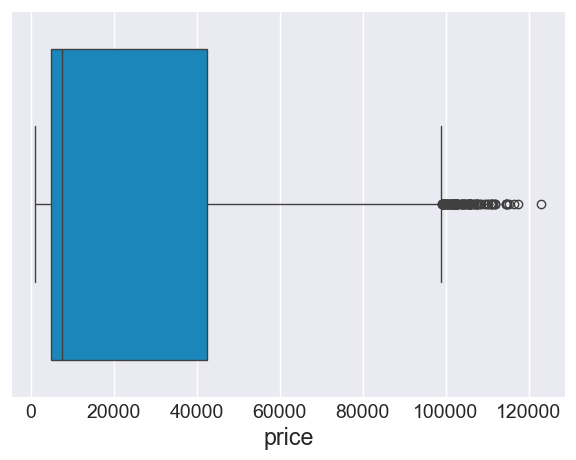

In [45]:
sns.boxplot(data=df,x='price')

<Axes: xlabel='price'>

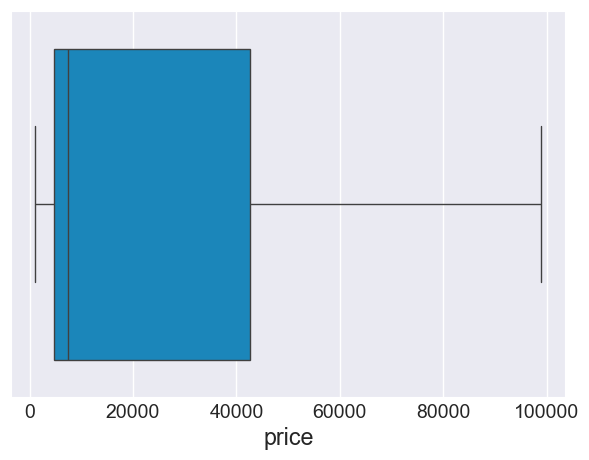

In [46]:
sns.boxplot(data=df[(df.price)<ub],x='price')

In [47]:
df[(df.price>lb)&(df.price)<ub]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953.0
1,SpiceJet,SG-8157,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5953.0
2,AirAsia,I5-764,Delhi,Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956.0
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955.0
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,1,Evening,Hyderabad,Business,10.08,49,69265.0
300149,Vistara,UK-826,Chennai,Afternoon,1,Night,Hyderabad,Business,10.42,49,77105.0
300150,Vistara,UK-832,Chennai,Morning,1,Night,Hyderabad,Business,13.83,49,79099.0


In [48]:
print("Mean:",df.price.mean())
print("Median:",df.price.median())
print("Mode:",df.price.mode()[0])
print("Maximum price:",df.price.min())
print("Minimum Price:",df.price.max())

Mean: 20885.266464312608
Median: 7425.0
Mode: 54608.0
Maximum price: 1105.0
Minimum Price: 123071.0


**Observation🔎**:  
* The Average price for flight is around **20885/-**.
* The minimum price is **1105/-**
* The Maximum price is **123071/-**


In [49]:
df.duration.min()
df.duration.max()
df.duration.mean()
df.duration.median()
df.duration.mode()

0.83

49.83

12.211023809365148

11.25

0    2.17
Name: duration, dtype: float64

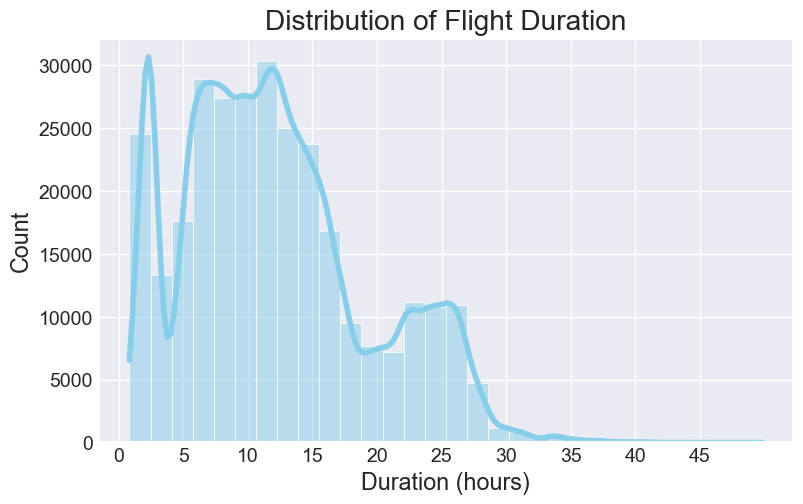

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(df['duration'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Flight Duration")
plt.xlabel("Duration (hours)")
plt.xticks(range(0,50,5))
plt.ylabel("Count")
plt.show();


**Observation🔎**  
  
- The Minimum travel for flight is **1hour 23minutes**🕜
- The Maximum travel for flight is **50hours 23minutes**🕧
- Mose of the filghts travel between **5-15hrs**🕧


### Categorical Only

In [51]:
print(df.columns.values)

['airline' 'flight' 'source_city' 'departure_time' 'stops' 'arrival_time'
 'destination_city' 'class' 'duration' 'days_left' 'price']


In [52]:
airline_agg=df.airline.value_counts()

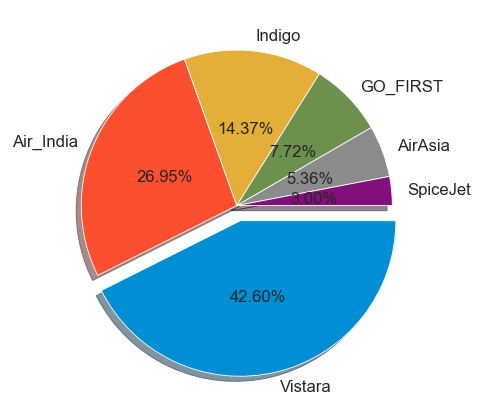

In [53]:
plt.figure(figsize=(4,4),dpi=120)
plt.pie(airline_agg,autopct='%.2f%%',labels=airline_agg.index,
        explode=[0.1,0,0,0,0,0],shadow=True,pctdistance=0.5,
        counterclock=False,textprops={'fontsize': 10});
plt.savefig(r"D:\\Datasets\\Airline distribution.png")
plt.show();

**Observation🔎**  
-The **Vistara** took over **42.60%** of the distribution.  
-And next **Air_India** took over **26.95%** of the distribution.

In [54]:
df.source_city.value_counts()

source_city
Delhi        61341
Mumbai       60895
Bangalore    52056
Kolkata      46342
Hyderabad    40804
Chennai      38696
Name: count, dtype: int64

In [55]:
df.destination_city.value_counts()

destination_city
Mumbai       59090
Delhi        57357
Bangalore    51060
Kolkata      49534
Hyderabad    42725
Chennai      40368
Name: count, dtype: int64

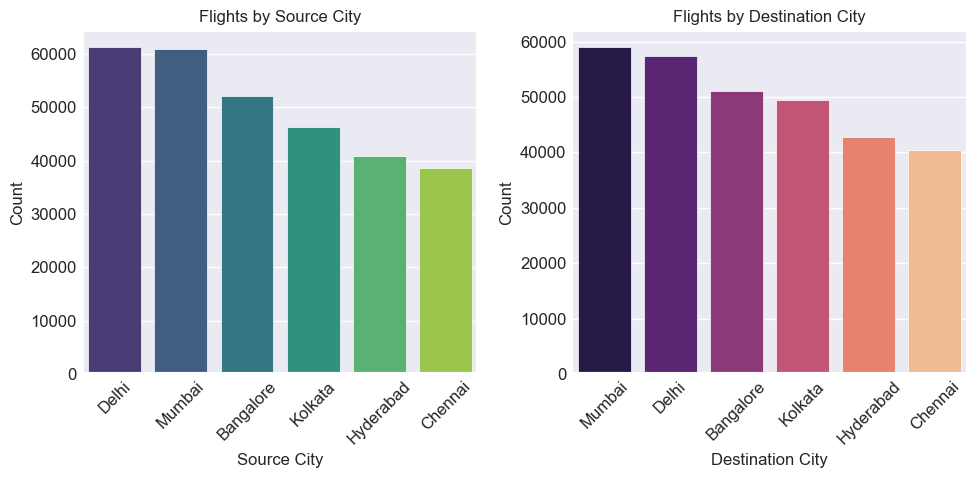

In [56]:
# Subplot 1 - Source_City
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.countplot(x='source_city', data=df, order=df['source_city'].value_counts().index, palette="viridis")
plt.title("Flights by Source City",fontsize=12)
plt.xlabel("Source City",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

# Subplot 2 - Destination City
plt.subplot(1, 2, 2)
sns.countplot(x='destination_city', data=df, order=df['destination_city'].value_counts().index, palette="magma")
plt.title("Flights by Destination City",fontsize=12)
plt.xlabel("Destination City",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show();


**Observation🔎**  
- **Mumbai** and **Delhi** was seen as the busiest cities with nearly 60,000 trips.
- And Next **Banglore** with more than 50,000 trips.

### Bivariate Analysis📈📊


###  Numerical vs Numerical


In [57]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [58]:
df[["days_left", "price"]].corr()#----->strong negative
df[["stops", "duration"]].corr()#-------->moderate related
df[["price", "duration"]].corr()

,days_left,price
days_left,1.000000,-0.091164
price,-0.091164,1.000000


,stops,duration
stops,1.000000,0.465885
duration,0.465885,1.000000


,price,duration
price,1.000000,0.202791
duration,0.202791,1.000000


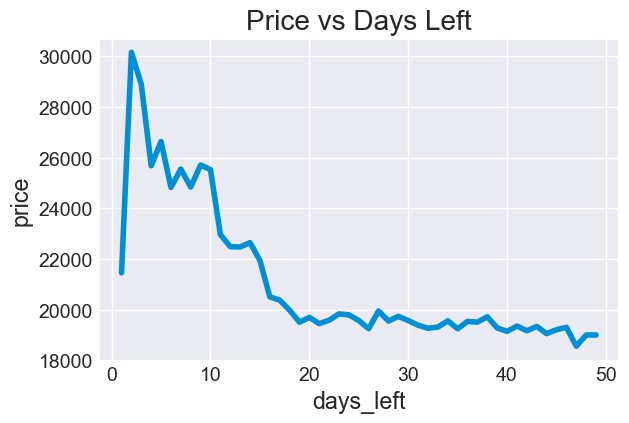

In [59]:
# 2. Price vs Days Left
plt.figure(figsize=(6,4))
sns.lineplot(x='days_left', y='price', data=df,ci=False)
plt.title("Price vs Days Left")
plt.savefig(r"D:\\Datasets\\Days left vs price.png")
plt.show();



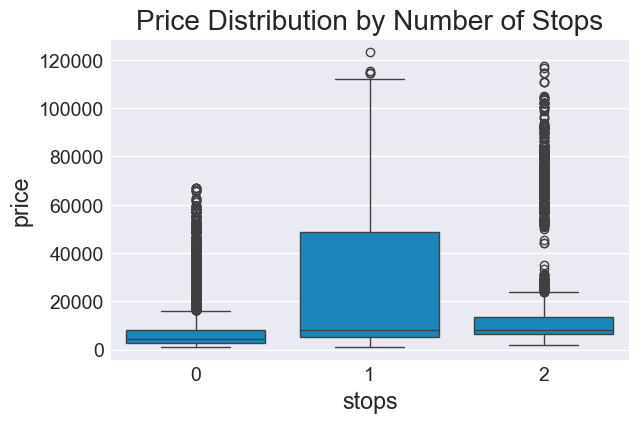

In [60]:
# 3. Boxplot: Price vs Stops (numeric stops)
plt.figure(figsize=(6,4))
sns.boxplot(x='stops', y='price', data=df)
plt.title("Price Distribution by Number of Stops")
plt.show();



# 4. Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['price','duration','days_left','stops']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show();


### Categorical vs Categorical

In [61]:
df['route']=df['source_city']+'->'+df['destination_city']

In [62]:
df['route'].value_counts()

route
Delhi->Mumbai           15289
Mumbai->Delhi           14809
Delhi->Bangalore        14010
Bangalore->Delhi        13755
Bangalore->Mumbai       12935
Mumbai->Bangalore       12884
Mumbai->Kolkata         12602
Delhi->Kolkata          11934
Kolkata->Mumbai         11467
Delhi->Chennai          10780
Kolkata->Delhi          10506
Mumbai->Hyderabad       10470
Mumbai->Chennai         10130
Hyderabad->Mumbai       10063
Bangalore->Kolkata      10028
Kolkata->Bangalore       9819
Chennai->Delhi           9782
Chennai->Mumbai          9336
Delhi->Hyderabad         9328
Bangalore->Hyderabad     8928
Hyderabad->Delhi         8505
Hyderabad->Kolkata       7987
Kolkata->Hyderabad       7897
Hyderabad->Bangalore     7854
Chennai->Kolkata         6983
Kolkata->Chennai         6653
Chennai->Bangalore       6493
Bangalore->Chennai       6410
Hyderabad->Chennai       6395
Chennai->Hyderabad       6102
Name: count, dtype: int64

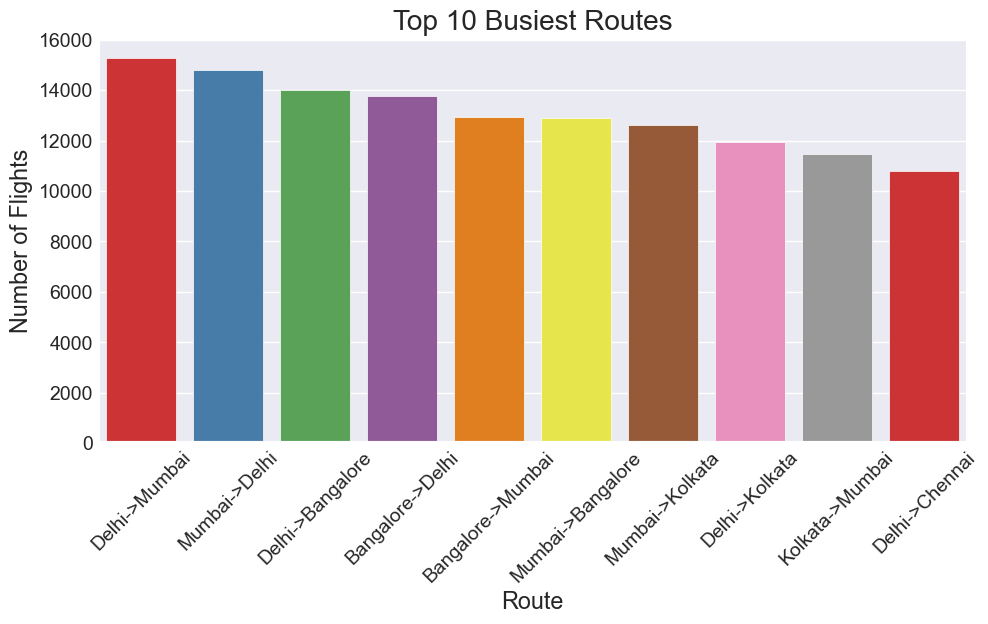

In [63]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=df['route'].value_counts().head(10).index,
    y=df['route'].value_counts().head(10).values,
    palette="Set1"   # <-- multi-color palette
)
plt.title("Top 10 Busiest Routes")
plt.xlabel("Route")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.savefig(r"D:\\Datasets\\Top 10 routes.png")
plt.show();

**Observation**:  
- These are the top 10 busiest routes over the flights of 
-The Highest Trips were between **Delhi** and **Mumbai**✈️ 


In [64]:
df[(df['source_city']=='Delhi')&(df['destination_city']=='Mumbai')][['airline','class']]

,airline,class
index,,
0,SpiceJet,Economy
1,SpiceJet,Economy
2,AirAsia,Economy
3,Vistara,Economy
4,Vistara,Economy
...,...,...
211968,Air_India,Business
211969,Air_India,Business
211970,Vistara,Business


In [65]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'route'],
      dtype='object')

In [66]:
pd.crosstab(df['airline'],df['class'])

class,Business,Economy
airline,,
AirAsia,0,16098
Air_India,32896,47993
GO_FIRST,0,23173
Indigo,0,43118
SpiceJet,0,9011
Vistara,60584,67261


In [67]:
pd.crosstab(df['airline'],df['source_city'])

source_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
airline,,,,,,
AirAsia,3364,1498,4387,1844,2829,2176
Air_India,12051,9911,17063,11087,12400,18377
GO_FIRST,4498,1289,5724,2504,3590,5568
Indigo,7080,6745,8277,6215,7295,7506
SpiceJet,1255,1219,2524,332,1947,1734
Vistara,23808,18034,23366,18822,18281,25534


In [68]:
pd.crosstab(df['airline'],df['destination_city'])

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
airline,,,,,,
AirAsia,3437,1516,4433,1560,2789,2363
Air_India,11959,11141,14549,12022,13043,18175
GO_FIRST,4386,1488,5509,2576,3794,5420
Indigo,6771,6449,8133,6146,8437,7182
SpiceJet,1088,1172,2541,383,2054,1773
Vistara,23419,18602,22192,20038,19417,24177


In [69]:
pd.crosstab(df['source_city'],df['destination_city'])

destination_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
source_city,,,,,,
Bangalore,0,6410,13755,8928,10028,12935
Chennai,6493,0,9782,6102,6983,9336
Delhi,14010,10780,0,9328,11934,15289
Hyderabad,7854,6395,8505,0,7987,10063
Kolkata,9819,6653,10506,7897,0,11467
Mumbai,12884,10130,14809,10470,12602,0


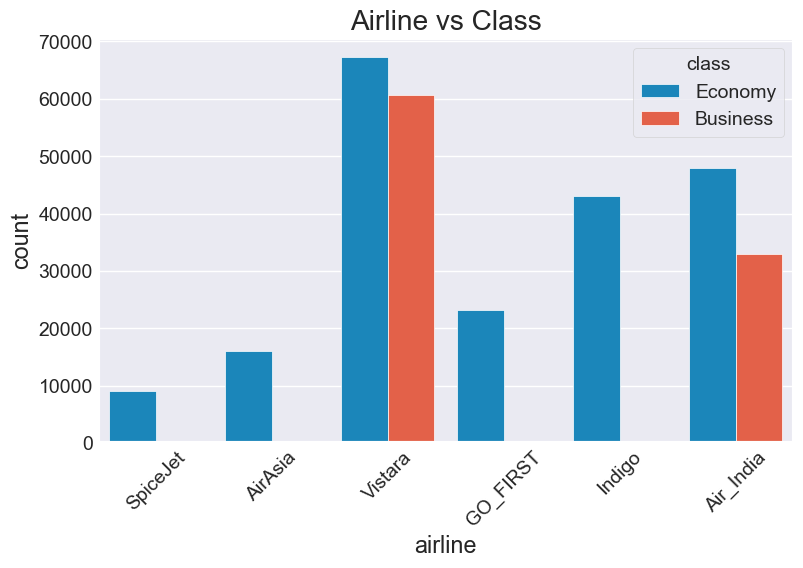

In [70]:
# 1.  : Airline vs Class
plt.figure(figsize=(8,5))
sns.countplot(x='airline', hue='class', data=df)
plt.xticks(rotation=45)
plt.title("Airline vs Class")
plt.show();

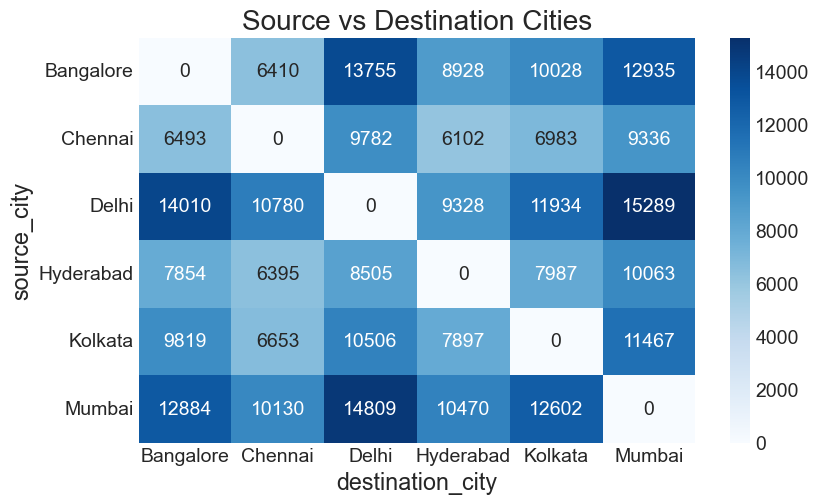

In [71]:
# 2. Heatmap: Source City vs Destination City
ct = pd.crosstab(df['source_city'], df['destination_city'])
plt.figure(figsize=(8,5))
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.title("Source vs Destination Cities")
plt.show();



In [72]:
df[df['departure_time']=='Late_Night']['stops'].value_counts()

stops
1    849
0    417
2     40
Name: count, dtype: int64

In [73]:
pd.crosstab(df['departure_time'], df['stops'])

stops,0,1,2
departure_time,,,
Afternoon,4649,40401,2743
Evening,9351,53388,2361
Late_Night,417,849,40
Morning,14902,115382,7637
Night,6685,40826,503


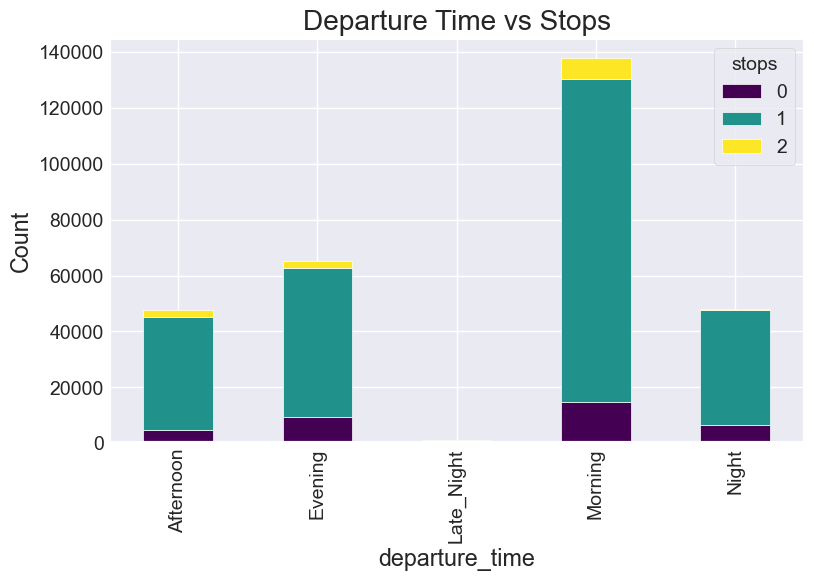

In [74]:
# 3. Stacked Bar (Departure Time vs Stops)
ct2 = pd.crosstab(df['departure_time'], df['stops'])
ct2.plot(kind='bar', stacked=True, figsize=(8,5), colormap="viridis")
plt.title("Departure Time vs Stops")
plt.ylabel("Count")
plt.show();

In [75]:
df[df['departure_time']=='Late_Night']['stops'].value_counts()

stops
1    849
0    417
2     40
Name: count, dtype: int64

## Numerical vs Categorical

#### Comparing the prices between Airlines

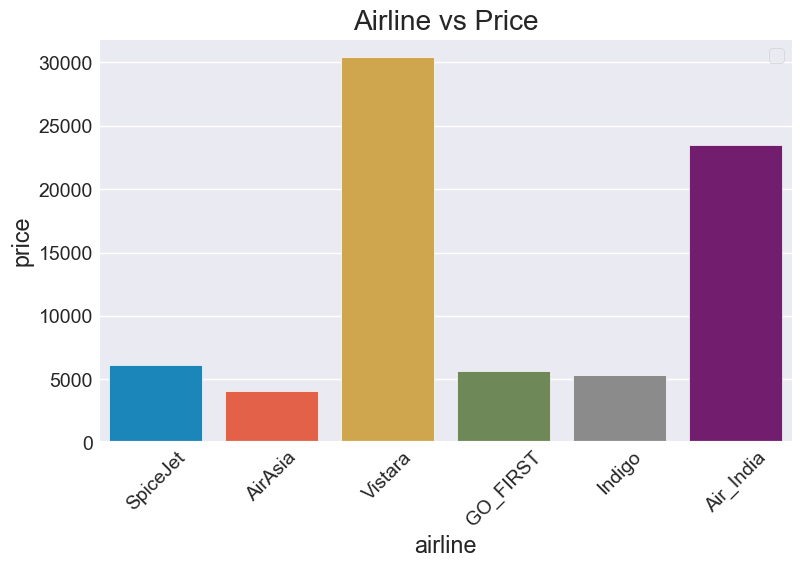

In [76]:
plt.figure(figsize=(8,5))
sns.barplot( data=df, x='airline', y='price',ci=False,palette=sns.color_palette())
plt.xticks(rotation=45)
plt.title("Airline vs Price")
plt.legend()
plt.savefig(r"D:\\Datasets\\Airline vs price.png")
plt.show();

#### The impact of price based on class

In [77]:
avg_prices = df.groupby('class')['price'].mean()
print(avg_prices)
eco = avg_prices['Economy']
biz = avg_prices['Business']

percent_increase = ((biz - eco) / eco) * 100
print(f"Business class is {percent_increase:.2f}% more expensive than Economy.")


class
Business    52551.657167
Economy      6560.964961
Name: price, dtype: float64
Business class is 700.97% more expensive than Economy.


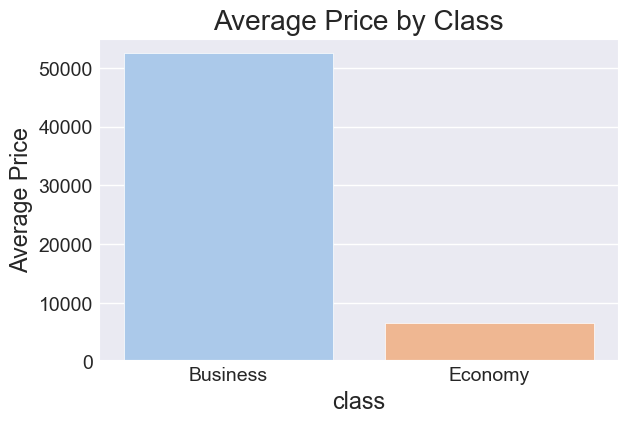

In [78]:
plt.figure(figsize=(6,4))
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="pastel")
plt.title("Average Price by Class")
plt.ylabel("Average Price")
plt.show();


**Observation**:  
-Business class is 700.97% more expensive than Economy.
**For the following Reasons**:
1. **Service Quality & Comfort**
Business class offers larger seats, extra legroom, recliners/flatbeds, and premium food & beverages.

These added luxuries translate to higher operating costs, which airlines recover via higher ticket prices.

2. **Limited Supply, High Demand**

Each aircraft has fewer Business class seats compared to Economy.

With fewer seats and often steady demand (especially from corporate/business travelers), prices remain high.

3. **Target Customers**

Airlines price Business class for business travelers and premium customers, who are usually less price-sensitive.

Economy travelers are more price-conscious, so airlines keep those fares competitive.

4. **Revenue Strategy** 

Airlines often use Business class profits to subsidize cheaper Economy fares.

This helps fill the plane while still keeping operations profitable.


#### The relation between stops and Duration

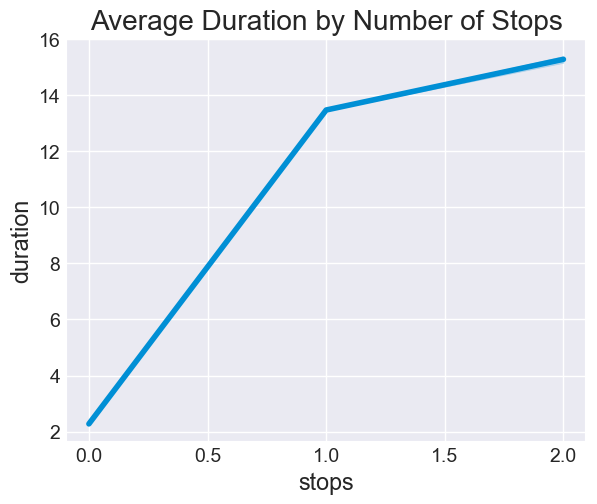

In [79]:
plt.figure(figsize=(6,5))
sns.lineplot(x='stops', y='duration', data=df, estimator=np.mean,palette=sns.color_palette())
plt.title("Average Duration by Number of Stops")
plt.show();

**Observation**:The increase in `stops` is directly proportional to the `duration `.
- The flight with zero stops which we can say Non-stop had less duration
- Whereas the fligh with 2 stops had long duration

#### The impact of prices over the departure time of flight

<Figure size 800x500 with 0 Axes>

<Axes: xlabel='departure_time', ylabel='price'>

Text(0.5, 1.0, 'Departure Time vs Price')

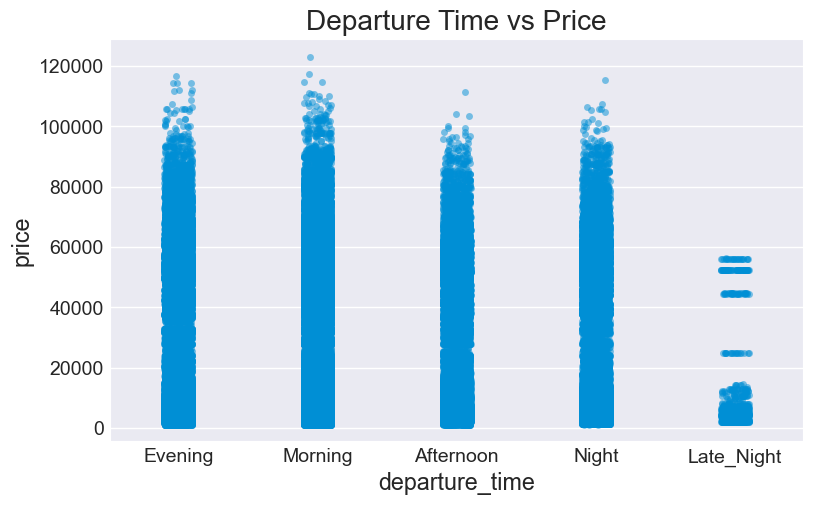

<Figure size 640x480 with 0 Axes>

In [80]:
plt.figure(figsize=(8,5))
sns.stripplot(x='departure_time', y='price', data=df, jitter=True, alpha=0.5)
plt.title("Departure Time vs Price")
plt.show();
plt.savefig(r"D:\\Datasets\\departure time vs price.png")

**Observation**:This strip plot shows that the prices of flights that departure at late_nights were very less

### Multi-Variate

### Price vs Stops vs Airline

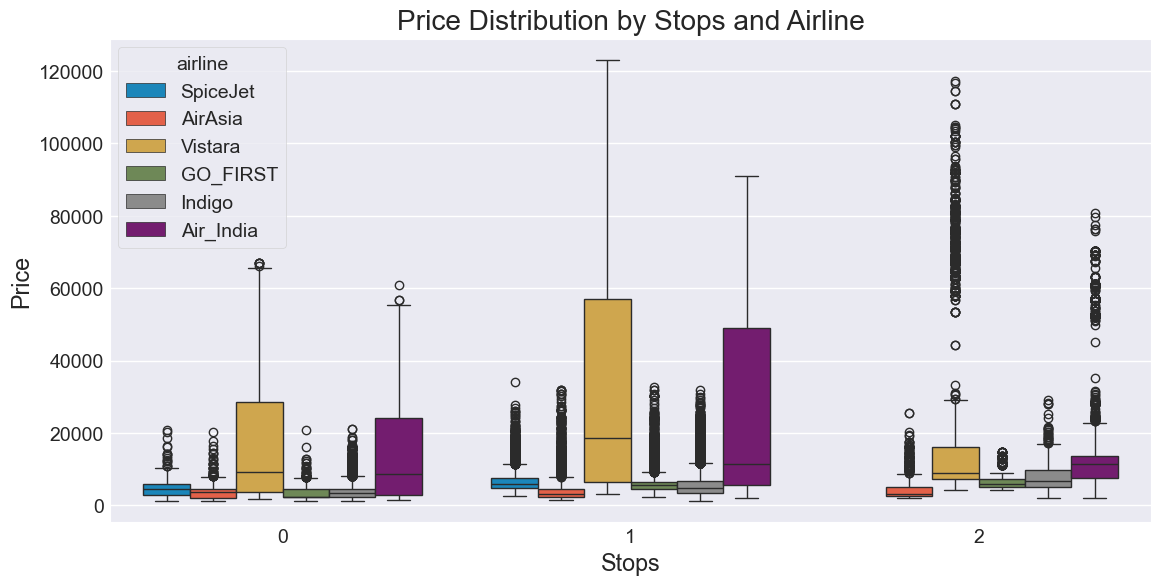

In [81]:
plt.figure(figsize=(12,6))
sns.boxplot(x='stops', y='price', hue='airline', data=df)
plt.title("Price Distribution by Stops and Airline")
plt.xlabel("Stops")
plt.ylabel("Price")
plt.show();


In [82]:
df.shape

(300134, 12)

In [83]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

### MultiVariate

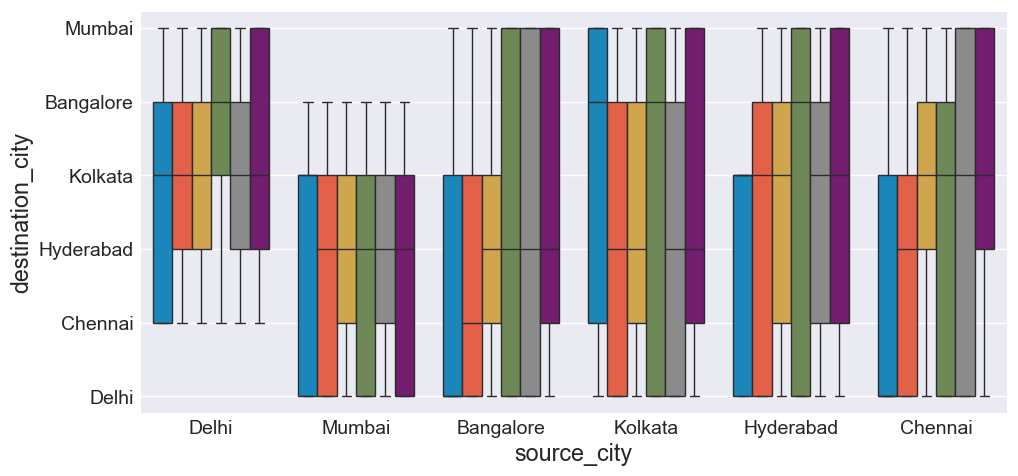

In [84]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x = "source_city", y = "destination_city", hue = "airline",legend=None);

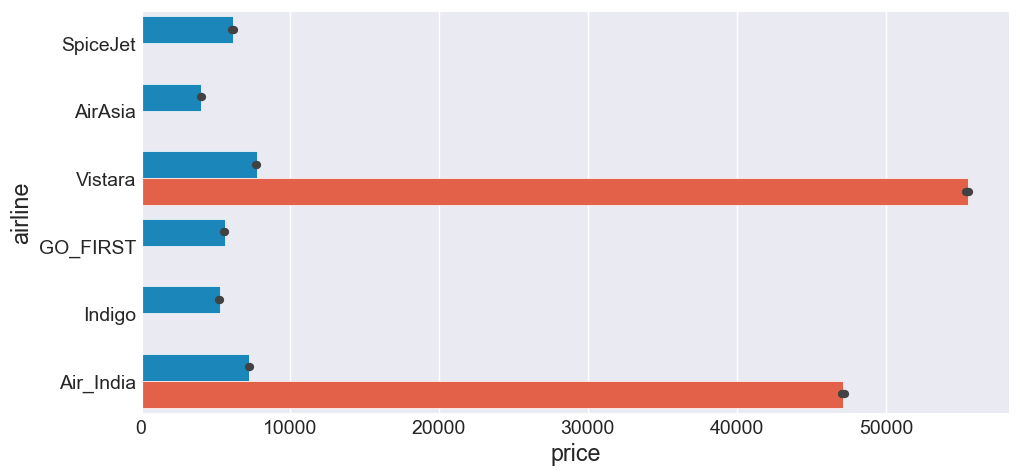

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x = "price", y = "airline", hue = "class",legend=None);

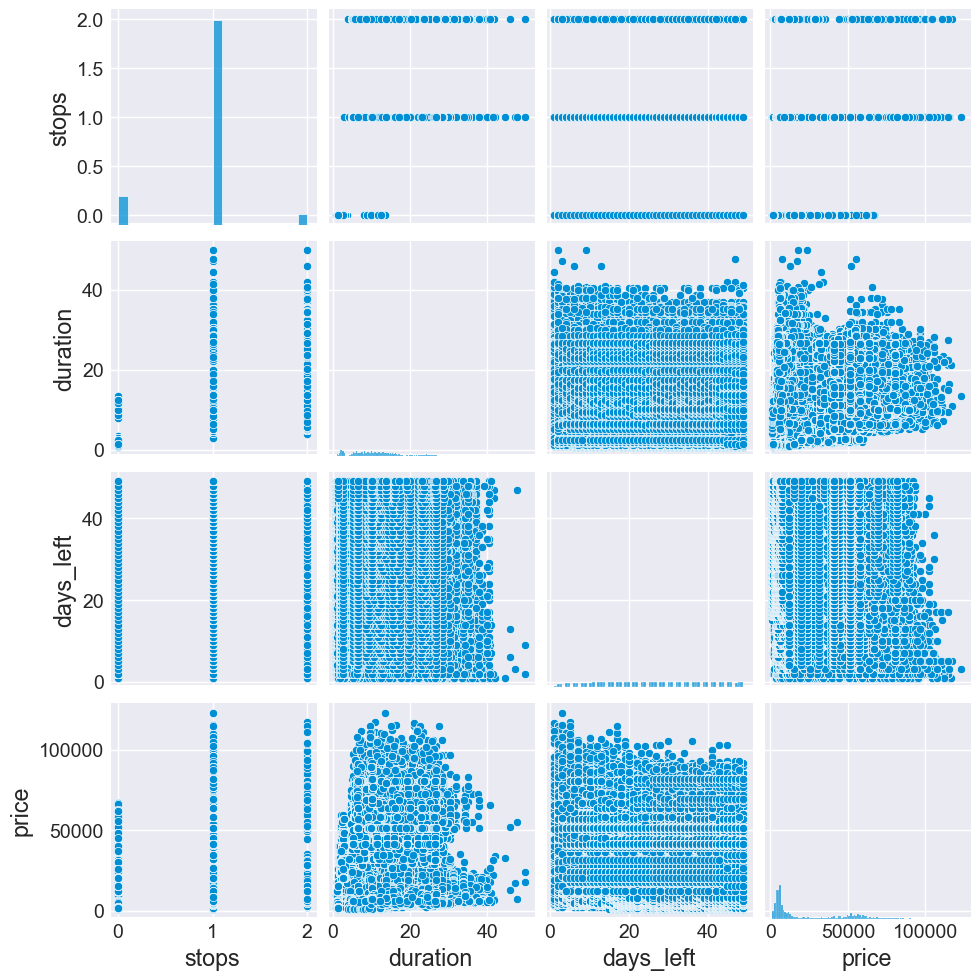

In [86]:
sns.pairplot(data=df)